# Short-Time Fourier Transform implementation in `WCA1`

In this notebook we study the STFT of a signal and its inverse.
We propose a Julia implementation using the libraries DSP and FFTW.
We also apply the implemented functions on synthetic signals and recorded sound signals.

Let's start by importing the `WCA1` library.

In [1]:
import Pkg
Pkg.activate("..")
using WCA1

 Activating environment at `/mnt/data/L2S/myWCA1/Project.toml`
┌ Info: Precompiling WCA1 [f15acf5a-a3df-11e9-3331-7bf93435fc23]
└ @ Base loading.jl:1278


$$
\def\R{\mathbb{R}}
\def\FT{\mathcal{F}}
\def\STFT{\mathrm{STFT}}
\def\dt{\mathrm{d}t}
\def\dw{\mathrm{d}\omega}
$$

## STFT of a signal

### Fourier Transform

Let's consider a real signal $x(t)$ such that $x\in L^1(\R)$.
The Fourier Transform of $x$ is defined as

$$\FT\{x(t)\}(\omega) = \hat{x}(\omega) = \int_{\R} x(t)\cdot e^{-2\pi i\omega t}\dt$$

The FT allows to study the spectral features of a signal as its a function of the frequency.

### Windowing

The FT cannot track changes of in a signal over time as it is a function of the frequency.
In order to study the signal spectrum *over time*, a window function can be applied
to the signal.

A window function is a non-negative function that is non-zero on a small interval and zero-valued outside that interval.
Commonly used windows are rectangular, trangular and bell-shaped curves.

### Continuous STFT

The STFT is function of frequency *and* time.
The idea of the STFT is to evaluate the FT of a small segment of the signal
tapered by a window function.

$$\STFT\{x(t)\}(\omega,\tau) = X(\omega,\tau)
= \int_{\R} x(t)w(t-\tau)\cdot e^{-2\pi i\omega t}\dt
= \FT_{\tau}\{x(t)w(t-\tau)\}(\omega)$$

### Discrete STFT

In practice, the STFT is calculated over discrete samples.

$$\STFT\{x[n]\}[\omega,m] = X[\omega,m] =
\sum\limits_{n=0}^{N-1} x[n]w[n-mH]\cdot e^{-2\pi i\omega n/N}$$

where $H=N-R$ is the hop size, $R$ is the number of overlapping samples.

### Uncertainty principle & resolution tradoffs

(to be filled in later)

### Implementation

Let's see the usage of the `stft` function in `WCA1`.

In [2]:
??stft

search: stft STFT istft show_stft show_istft AbstractFloat SegmentationFault



```
stft(s, nperseg=div(length(s),8), noverlap=div(nperseg,2); onesided=eltype(s)<:Real, nfft=DSP.nextfastfft(nperseg), fs=1, window=nothing)
```

Wrapper around `DSP.Periodograms.stft` function that computes the STFT of a signal using the overlap-add method. Returns an `STFT` object.

# Extended help

### Arguments

  * `s::AbstractVector{T<:Real}`: the input signal array.
  * `nperseg::Int=div(length(s), 64)`: the number of samples per window.
  * `noverlap::Int=div(nperseg, 1)`: the number of overlapping samples.

### Keyword Arguments

  * `onesided::Bool=eltype(s)<:Real`: if `true`, return a one-sided spectrum for real input signal. If `false` return a two-sided spectrum.
  * `nfft::Int=DSP.nextfastfft(nperseg)`: the number of samples to use for the Fourier Transform. if `n` < `nfft`, the window is padded with zeros.
  * `fs::Real=1`: the sample rate of the input signal.
  * `window::Union{Function,AbstractVector,Nothing}=nothing`: the window function to use. If `nothing`, a rectangular window is used.


Now that we have seen the function documentation, let's use it to analyse the spectrum of a synthetic linear chirp.

In [3]:
include("../tests/signals.jl")
import DSP
using DSP.Windows

fs = 16000 #Hz
duration = 2 #seconds
x = linear_chirp(fs, duration)

# play chirp
include("../tests/utils.jl")
play_audio(x, fs)

PyObject <IPython.lib.display.Audio object>

Calculate the STFT with default parameters:
- window size = signal length / 64
- overlap ratio = 1/2

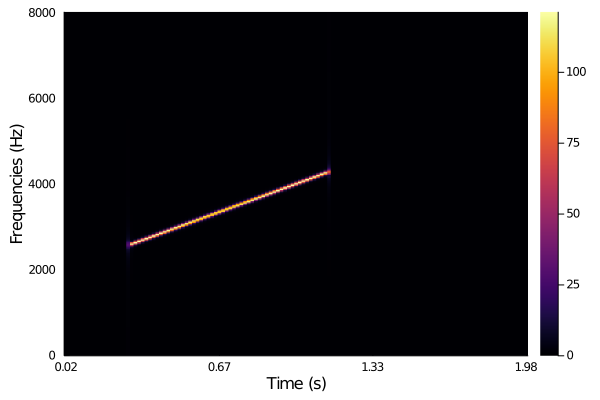

In [4]:
X = stft(x; fs=fs, window=hanning)
show_stft(X)

Now let's see how the window size and overlap affect the STFT.

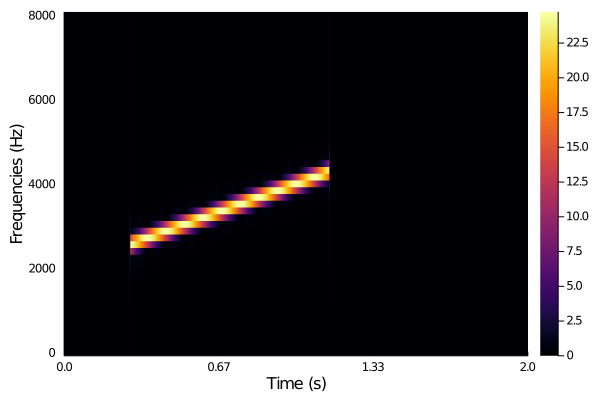

In [5]:
# Small window, overlap ratio 1/2
show_stft(stft(x, 100, 50; fs=fs, window=hanning))

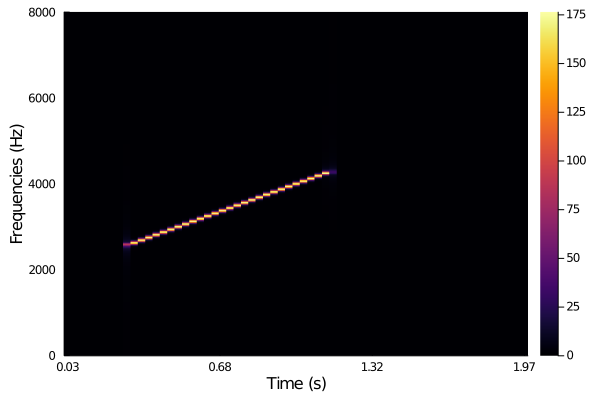

In [6]:
# Large window, overlap ratio 1/2
show_stft(stft(x, 1000, 500; fs=fs, window=hanning))

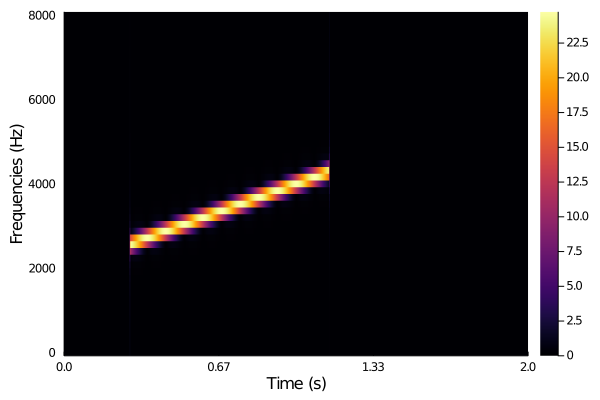

In [7]:
# Small window, overlap ratio 9/10
show_stft(stft(x, 100, 90; fs=fs, window=hanning))

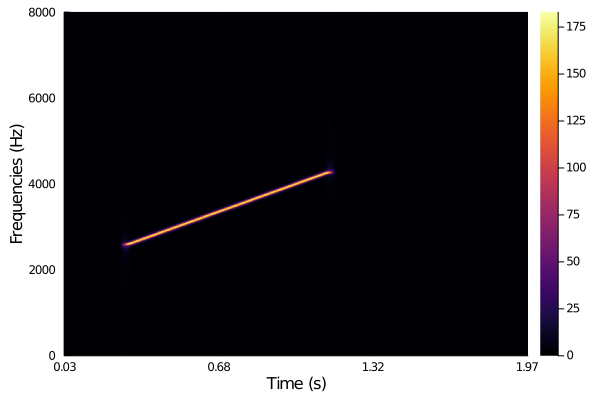

In [8]:
# Large window, overlap ratio 9/10
show_stft(stft(x, 1000, 900; fs=fs, window=hanning))

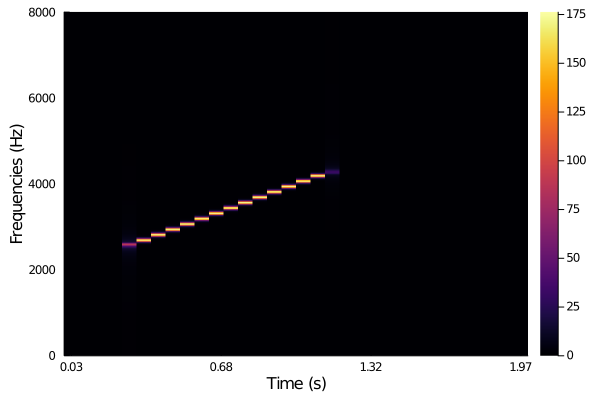

In [9]:
# Large window, no overlap!
show_stft(stft(x, 1000, 0; fs=fs, window=hanning))

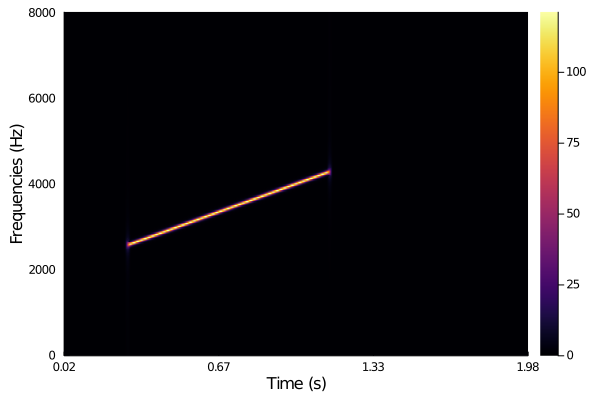

In [10]:
# Medium window, overlap (N-1)
show_stft(stft(x, 500, 499; fs=fs, window=hanning))

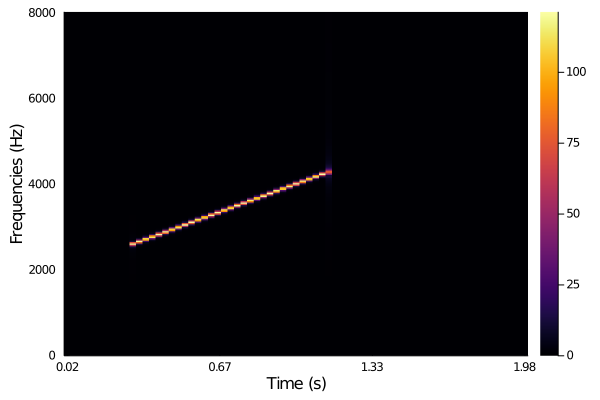

In [11]:
# Medium window, overlap ratio 1/10
show_stft(stft(x, 500, 50; fs=fs, window=hanning))

#### Window size

For larger window sizes, we have higher frequency resolution.
However, the time resolution is low as we have fewer time samples for the STFT.

For smaller windows, we get higher time resolution as we have more time samples for the STFT, while losing frequency resolution.

#### Overlap

In the case of little or no overlap, the resulting spectrum has low time resolution.
Indeed, the straight line appears to be a piece-wise constant function of time.

For overlap ratios close to $1$, the time resolution is significantly better
obtaining the best results (given an adequate window size).
However, one should keep in mind that high overlaps can be computationally costly.

## Inverse Short-Time Fourier Transform (iSTFT)

### Continuous iSTFT

(to be filled in later)

### Discrete iSTFT

(to be filled in later)

### Least-squares minimization

(to be filled in later)

### Implementation

Let's see the usage of the `istft` function in `WCA1`.

In [12]:
??istft

search: istft show_istft istaskfailed



```
istft(S, siglength, nperseg=onesided ? div(size(X,1)-1,2) : size(X,1), noverlap=div(nperseg,1); onesided=eltype(s)<:Real, nfft=DSP.nextfastfft(nperseg), fs=1, window=nothing)
```

Calculates the inverse Short-Time Fourier Transform (iSTFT). The function implements the least-squares minimization method to find a signal that minimizes the error between its STFT and the given STFT.

# Extended help

### Arguments

  * `S::Matrix{Complex}`: the signal STFT.
  * `siglength::Int`: the number of samples in original signal.
  * `nperseg::Int=onesided ? (size(X, 1) - 1) << 1 : size(X, 1)`:  the number of samples per window.
  * `noverlap::Int=div(nperseg, 1)`: the number of overlapping samples.

### Keyword Arguments

  * `onesided::Bool=eltype(s)<:Real`: if `true`, return a one-sided spectrum for real input signal. If `false` return a two-sided spectrum.
  * `nfft::Int=DSP.nextfastfft(n)`: the number of samples to use for the Fourier Transform. If `n` < `nfft`, the window is padded with zeros.
  * `fs::Real=1`: the sample rate of the input signal.
  * `window::Union{Function,AbstractVector,Nothing}=nothing`: the window function to use. If `nothing`, a rectangular window is used.

---

```
istft(S::STFT)
```

Wrapper around `istft` that takes `STFT` object as input to calculate the inverse Short-Time Fourier Transform.


Let's now take a reasonable STFT resolution to calculate its inverse uinsg `istft`.

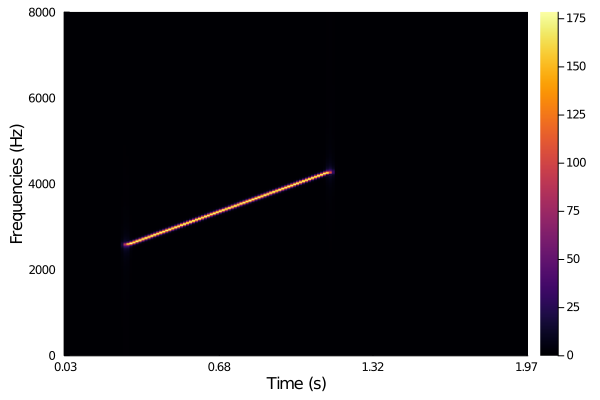

In [13]:
X = stft(x, 1000, 800; fs=fs, window=hanning)
show_stft(X)

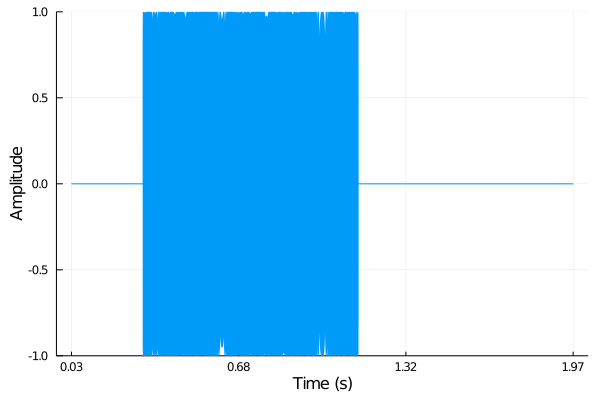

In [14]:
# Call inverse stft function
y = istft(X)
show_istft(X)

In [15]:
# define distance for signals
rel_dist(x, y) = sum(abs.(x - y)) / sum(abs.(x))
max_dist(x, y) = maximum(abs.(x - y))

# evaluate difference between original and reconstructed signal
println("Relative error with L1 distance: ", rel_dist(x, y))
println("Absolute error with L∞ distance: ", max_dist(x, y))

Relative error with L1 distance: 1.800455162408783e-16
Absolute error with L∞ distance: 6.661338147750939e-16


Now let's test our functions on a recorded speech signal.

In [16]:
import WAV

x, fs = WAV.wavread("../samples/speech_signal_example.wav")
x = reshape(x, length(x))
play_audio(x, fs)

PyObject <IPython.lib.display.Audio object>

Let's calculate its STFT.

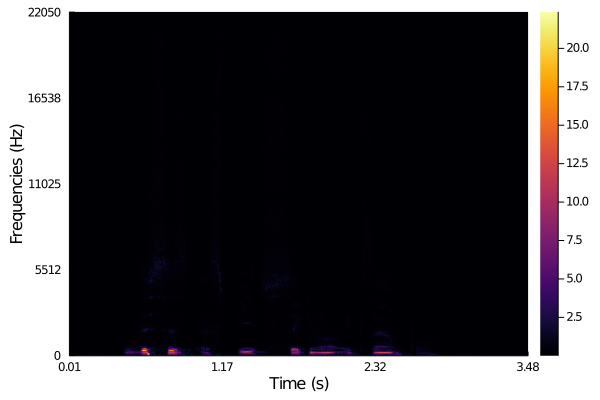

In [17]:
X = stft(x, 1000, 900; fs=fs, window=hanning)
show_stft(X)

Let's now calculate its inverse.

In [18]:
y = istft(X)
play_audio(y, fs)

PyObject <IPython.lib.display.Audio object>

The reconstructed sound is indistinguishable from the original.
Let's calculate the error between both signals.

In [19]:
println("Relative error with L1 distance: ", rel_dist(x, y))
println("Absolute error with L∞ distance: ", max_dist(x, y))

using Plots
t = (0:length(x)-1) / fs
plot(t, y, color="blue", label="reconstructed signal")
plot!(t, x - y, color="red", label="relative error")

Relative error with L1 distance: 1.1325511078322142e-5
Absolute error with L∞ distance: 0.000640888698995941
